In [1]:
library(pander)
library(car)
panderOptions('knitr.auto.asis', FALSE)

Loading required package: carData


In [2]:
white.test <- function(lmod,data){
    u2 <- lmod$residuals^2
    y <- fitted(lmod)
    Ru2 <- summary(lm(u2 ~ y + I(y^2)))$r.squared 
    LM <- nrow(data)*Ru2
    p.value <- 1-pchisq(LM, 2)
    data.frame("Test statistic"=LM,"P value"=p.value) }

In [3]:
FIND_EXTREME_OBSERVARION <- function(x,sd_factor=2){ 
    which(x>mean(x)+sd_factor*sd(x) | x<mean(x)-sd_factor*sd(x))
}

In [4]:
path_data = '/Users/alessandropontini/Desktop/Statistical Modelling/datasets/cost_function2.xls'

In [5]:
# read excell
library("readxl")
data <- read_excel(path_data)

In [6]:
summary(data)

       id             year           cost                q         
 Min.   :  1.0   Min.   :1970   Min.   :  0.1304   Min.   :     4  
 1st Qu.: 78.5   1st Qu.:1970   1st Qu.: 10.2210   1st Qu.:  1971  
 Median :138.5   Median :1970   Median : 25.5454   Median :  5646  
 Mean   :127.2   Mean   :1970   Mean   : 53.2700   Mean   : 10469  
 3rd Qu.:178.8   3rd Qu.:1970   3rd Qu.: 55.3159   3rd Qu.: 12366  
 Max.   :218.0   Max.   :1970   Max.   :737.4088   Max.   :115500  
       pl              sl                pk              sk        
 Min.   : 5063   Min.   :0.04590   Min.   :31.73   Min.   :0.0924  
 1st Qu.: 6975   1st Qu.:0.09972   1st Qu.:67.61   1st Qu.:0.1925  
 Median : 7890   Median :0.12310   Median :74.12   Median :0.2186  
 Mean   : 8002   Mean   :0.13897   Mean   :71.42   Mean   :0.2264  
 3rd Qu.: 8855   3rd Qu.:0.16980   3rd Qu.:78.79   3rd Qu.:0.2528  
 Max.   :13044   Max.   :0.32910   Max.   :92.65   Max.   :0.4571  
       pf              sf        
 Min.   : 9.00

In [7]:
VAR_NUMERIC <- c("cost","q","pl","sl","pk","sk","pf","sf")

In [8]:
pander(head(data))



| id | year |  cost  |  q   |  pl  |   sl   |  pk   |   sk   |  pf   |   sf   |
|:--:|:----:|:------:|:----:|:----:|:------:|:-----:|:------:|:-----:|:------:|
| 1  | 1970 | 0.213  |  8   | 6869 | 0.3291 | 64.94 | 0.4197 |  18   | 0.2512 |
| 4  | 1970 | 3.043  | 869  | 8373 | 0.103  | 68.23 | 0.2913 | 21.07 | 0.6057 |
| 5  | 1970 | 9.406  | 1412 | 7961 | 0.0891 | 40.69 | 0.1567 | 41.53 | 0.7542 |
| 14 | 1970 | 0.7606 |  65  | 8972 | 0.2802 | 41.24 | 0.1282 | 28.54 | 0.5916 |
| 15 | 1970 | 2.259  | 295  | 8218 | 0.1772 | 71.94 | 0.1623 | 39.2  | 0.6606 |
| 16 | 1970 | 1.342  | 183  | 5063 | 0.096  | 74.43 | 0.2629 | 35.51 | 0.6411 |



In [9]:
colnames(data)

[1] "id"   "year" "cost" "q"    "pl"   "sl"   "pk"   "sk"   "pf"   "sf"

In [10]:
pander(summary(data[,VAR_NUMERIC]))



|       cost       |       q        |      pl       |       sl        |
|:----------------:|:--------------:|:-------------:|:---------------:|
| Min.   :  0.1304 | Min.   :     4 | Min.   : 5063 | Min.   :0.04590 |
| 1st Qu.: 10.2210 | 1st Qu.:  1971 | 1st Qu.: 6975 | 1st Qu.:0.09972 |
| Median : 25.5454 | Median :  5646 | Median : 7890 | Median :0.12310 |
| Mean   : 53.2700 | Mean   : 10469 | Mean   : 8002 | Mean   :0.13897 |
| 3rd Qu.: 55.3159 | 3rd Qu.: 12366 | 3rd Qu.: 8855 | 3rd Qu.:0.16980 |
| Max.   :737.4088 | Max.   :115500 | Max.   :13044 | Max.   :0.32910 |

Table: Table continues below

 

|      pk       |       sk       |      pf       |       sf       |
|:-------------:|:--------------:|:-------------:|:--------------:|
| Min.   :31.73 | Min.   :0.0924 | Min.   : 9.00 | Min.   :0.2435 |
| 1st Qu.:67.61 | 1st Qu.:0.1925 | 1st Qu.:24.48 | 1st Qu.:0.5901 |
| Median :74.12 | Median :0.2186 | Median :30.66 | Median :0.6450 |
| Mean   :71.42 | Mean   :0.2264 | Mean   :30.75

In [11]:
pander(cor(data[,VAR_NUMERIC]))



|  &nbsp;  |  cost   |    q     |   pl    |    sl     |    pk     |
|:--------:|:-------:|:--------:|:-------:|:---------:|:---------:|
| **cost** |    1    |  0.9667  | 0.1236  |  -0.1359  |  0.1049   |
|  **q**   | 0.9667  |    1     | 0.05978 |  -0.197   |  0.07032  |
|  **pl**  | 0.1236  | 0.05978  |    1    |  0.06881  |  -0.2475  |
|  **sl**  | -0.1359 |  -0.197  | 0.06881 |     1     |  0.06475  |
|  **pk**  | 0.1049  | 0.07032  | -0.2475 |  0.06475  |     1     |
|  **sk**  | -0.1146 | -0.08669 | -0.134  | -0.005394 | -0.06989  |
|  **pf**  | 0.1756  | 0.06365  |  0.254  | -0.06209  |  0.09065  |
|  **sf**  | 0.1784  |  0.1952  | 0.04639 |  -0.6487  | -0.008777 |

Table: Table continues below

 

|  &nbsp;  |    sk     |    pf    |    sf     |
|:--------:|:---------:|:--------:|:---------:|
| **cost** |  -0.1146  |  0.1756  |  0.1784   |
|  **q**   | -0.08669  | 0.06365  |  0.1952   |
|  **pl**  |  -0.134   |  0.254   |  0.04639  |
|  **sl**  | -0.005394 | -0.06209 |  -0.6487

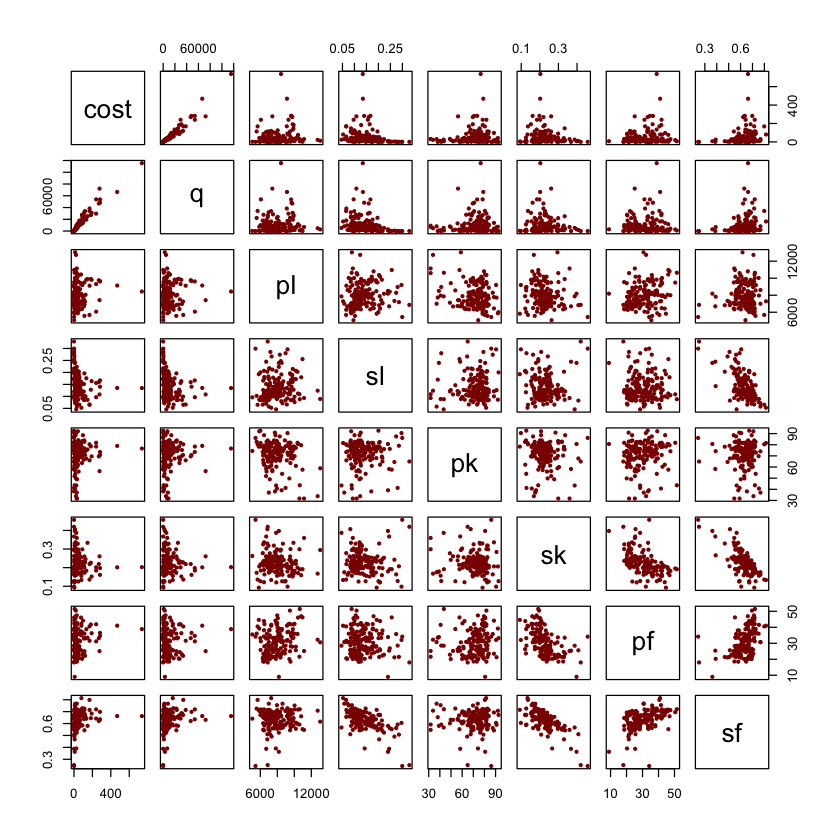

In [14]:
plot(data[,VAR_NUMERIC],pch=19,cex=.5,col='dark red')

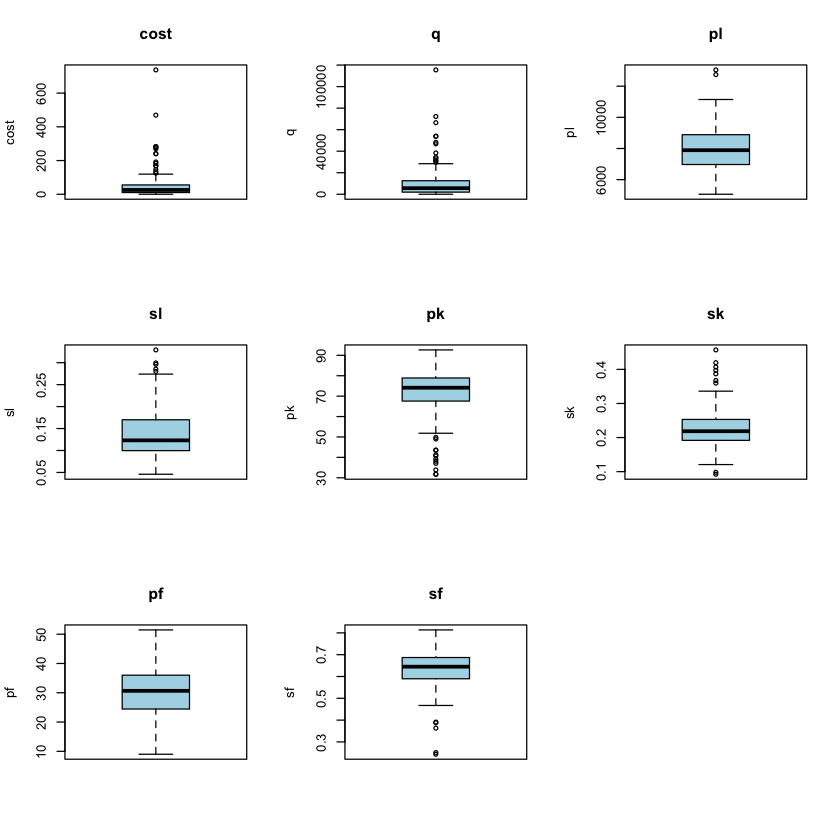

In [15]:
par(mfrow=c(3,3))
for(i in VAR_NUMERIC){
    boxplot(data[,i],main=i,col="lightblue",ylab=i) }

In [16]:
mod1 <- lm(cost ~ q + sf + pl + pk, data)

In [17]:
pander(summary(mod1))



|     &nbsp;      | Estimate | Std. Error | t value | Pr(>|t|)  |
|:---------------:|:--------:|:----------:|:-------:|:---------:|
| **(Intercept)** |  -66.25  |   20.62    | -3.213  | 0.001601  |
|      **q**      | 0.005505 | 0.0001143  |  48.17  | 2.338e-94 |
|     **sf**      |  -12.87  |   20.73    | -0.6209 |  0.5356   |
|     **pl**      | 0.005038 |  0.001254  |  4.018  | 9.195e-05 |
|     **pk**      |  0.4162  |   0.1465   |  2.841  | 0.005111  |



| Observations | Residual Std. Error | $R^2$  | Adjusted $R^2$ |
|:------------:|:-------------------:|:------:|:--------------:|
|     158      |        21.22        | 0.9421 |     0.9406     |

Table: Fitting linear model: cost ~ q + sf + pl + pk



In [18]:
pander(anova(mod1))



|    &nbsp;     | Df  | Sum Sq  | Mean Sq | F value |  Pr(>F)   |
|:-------------:|:---:|:-------:|:-------:|:-------:|:---------:|
|     **q**     |  1  | 1112087 | 1112087 |  2471   | 2.528e-96 |
|    **sf**     |  1  |   132   |   132   | 0.2933  |  0.5889   |
|    **pl**     |  1  |  5238   |  5238   |  11.64  | 0.0008272 |
|    **pk**     |  1  |  3633   |  3633   |  8.071  | 0.005111  |
| **Residuals** | 153 |  68865  |  450.1  |   NA    |    NA     |

Table: Analysis of Variance Table



In [20]:
pander(white.test(mod1, data))



| Test.statistic | P.value |
|:--------------:|:-------:|
|      104       |    0    |



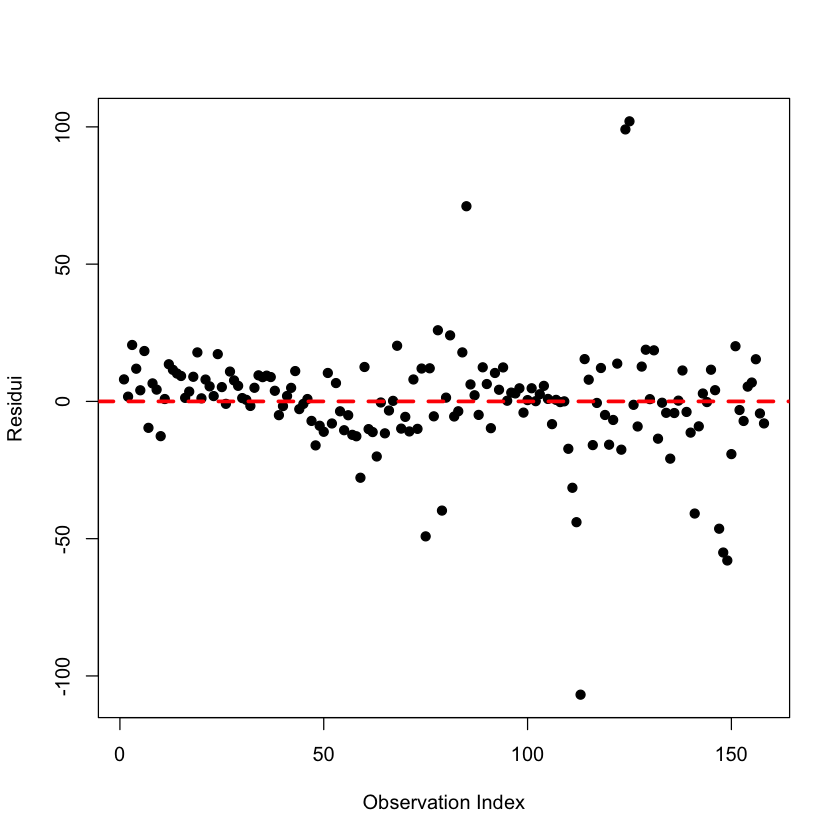

In [24]:
plot(1:nrow(data),resid(mod1),xlab="Observation Index",ylab="Residui",pch=19) 
abline(h=0,col=2,lwd=3,lty=2)

In [26]:
library(Hmisc)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



In [27]:
d1 <- data
d1$resid <- resid(mod1)
d1$resid_l1 <- Lag(d1$resid,1)

In [30]:
pander(cor(data.frame(d1$resid,d1$resid_l1),use="pairwise.complete.obs"))



|     &nbsp;      | d1.resid | d1.resid_l1 |
|:---------------:|:--------:|:-----------:|
|  **d1.resid**   |    1     |   0.3053    |
| **d1.resid_l1** |  0.3053  |      1      |



In [31]:
mod2 <- arima(d1$cost, order=c(1,0,0), xreg = d1[,c("q","sf","pl","pk")],method="ML")
mod2


Call:
arima(x = d1$cost, order = c(1, 0, 0), xreg = d1[, c("q", "sf", "pl", "pk")], 
    method = "ML")

Coefficients:
         ar1  intercept       q        sf      pl      pk
      0.3153   -55.9543  0.0055  -11.4782  0.0041  0.3636
s.e.  0.0764    19.1710  0.0001   19.2550  0.0012  0.1437

sigma^2 estimated as 393.6:  log likelihood = -696.29,  aic = 1406.58

In [33]:
library(lmtest)
coeftest(mod2)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




z test of coefficients:

             Estimate  Std. Error z value  Pr(>|z|)    
ar1        3.1532e-01  7.6424e-02  4.1259 3.693e-05 ***
intercept -5.5954e+01  1.9171e+01 -2.9187 0.0035149 ** 
q          5.4917e-03  1.4386e-04 38.1737 < 2.2e-16 ***
sf        -1.1478e+01  1.9255e+01 -0.5961 0.5510988    
pl         4.1256e-03  1.1775e-03  3.5037 0.0004588 ***
pk         3.6363e-01  1.4370e-01  2.5305 0.0113900 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [34]:
durbinWatsonTest(as.numeric(mod2$residuals))

[1] 1.97396